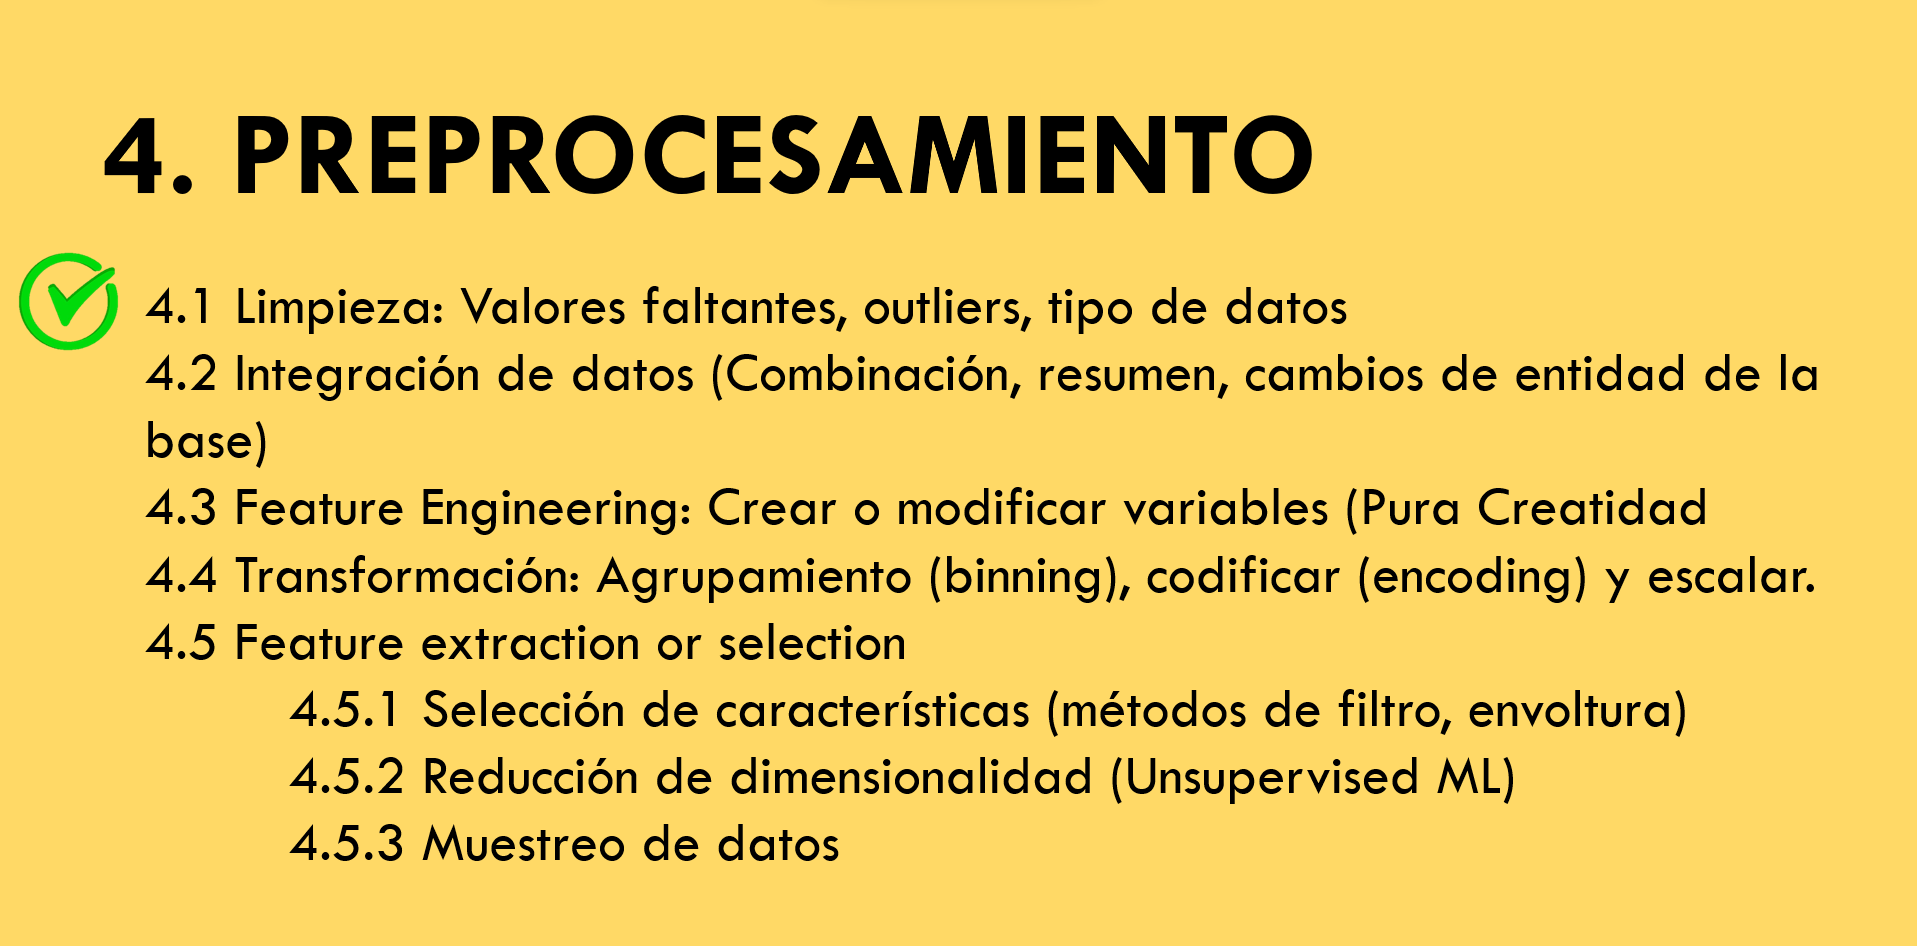

# Limpieza de datos


La mayoría de los datos del mundo real con los que trabajamos son datos sin procesar, lo que significa que pueden contener entradas de información repetidas, faltantes e irrelevantes. Por lo tanto, si estos datos se utilizan en cualquier análisis de aprendizaje automático, se obtendrá una precisión baja o una predicción incorrecta. 
Por esta razón, la limpieza de datos, también conocida como limpieza de datos, es una técnica importante que viene antes de cualquier construcción de modelo.

En este cuaderno, veremos algunas de las técnicas comunes de limpieza de datos que los científicos de datos pueden utilizar para preparar sus datos para el análisis.

## Objetivos

* Manejar los duplicados.
* Manejar los valores faltantes.
* Manejar los valores atípicos.

***


## **Setup**


Para esta práctica de laboratorio, usaremos las siguientes bibliotecas:
  - [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) para gestionar los datos .
  - [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) para operaciones matemáticas.
  - [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) para visualizar el datos.
  - [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) para visualizar los datos.
  - [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) para aprendizaje automático y funciones relacionadas con el canal de aprendizaje.
  - [`scipy`](https://scipy.org/) para cálculos estadísticos.

In [1]:
#Esto nos evita algunas advertencias que ocupan espacios, pero no es necesario
import warnings 
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

## **Leer y comprender nuestros datos**


Para esta práctica de laboratorio, utilizaremos el archivo Ames_Housing_Data.tsv, alojado en el almacenamiento de objetos de IBM Cloud. El conjunto de datos sobre vivienda de Ames examina las características de las casas vendidas en Ames (una pequeña ciudad en el estado de Iowa en Estados Unidos) durante el período 2006-2010.


In [2]:
housing = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data1.tsv", sep='\t')
housing.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


Podemos encontrar más información sobre las características y tipos usando el método `info()`.


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

Según el resultado anterior, tenemos 2930 entradas, de 0 a 2929, así como 81 funciones. La columna "Non-Null Count" muestra el número de entradas no nulas. Si el recuento es 2930, entonces no faltan valores para esa característica en particular. 'SalePrice' es nuestro objetivo o variable de respuesta y el resto de las características son nuestras variables predictoras.

También tenemos una combinación de tipos de datos numéricos (28 int64 y 11 float64) y de objetos (posiblemente texto).


Next, let's use the `describe()` function to show the count, mean, min, max of the sale price attribute.


In [4]:
housing["SalePrice"].describe()

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

Del análisis anterior, es importante señalar que el valor mínimo es mayor que 0. Además, existe una gran diferencia entre el valor mínimo y el percentil 25. Es mayor que el percentil 75 y el valor máximo. Esto significa que es posible que nuestros datos no estén distribuidos normalmente (un supuesto importante para el análisis de regresión lineal), por lo que verificaremos la normalidad en la sección Transformación logarítmica.


In [5]:
housing["Sale Condition"].value_counts()

Sale Condition
Normal     2414
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

Arriba, hay 11 características, con coeficientes superiores a 0,5, que están fuertemente correlacionados con el precio de venta.


## **Manejo de los duplicados**

Como se menciona en el video, tener valores duplicados puede afectar nuestro análisis, por lo que es bueno verificar si hay duplicados en nuestros datos. Usaremos la función pandas `duplicated()` y buscaremos por la columna 'PID', que contiene un número de índice único para cada entrada.

In [6]:
duplicate = housing[housing.duplicated(['PID'])]
duplicate

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


Como podemos ver, hay una fila duplicada en este conjunto de datos. Para eliminarlo, podemos usar la función pandas `drop_duplicates()`. De forma predeterminada, elimina todas las filas duplicadas en función de todas las columnas.


In [7]:
dup_removed = housing.drop_duplicates()
dup_removed 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


Una forma alternativa de comprobar si hay índices duplicados en nuestro conjunto de datos es utilizar la función `index.is_unique`.


In [8]:
housing.index.is_unique

True

Ahora, eliminemos los duplicados en una columna específica estableciendo el subconjunto a evaluar igual a la columna que contiene el duplicado, como "Order".


In [17]:
removed_sub = housing.drop_duplicates(subset=['Order'])

## **Manejo de los valores faltantes**


Resumen opciones:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Crear un DataFrame de ejemplo con valores faltantes
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [5, np.nan, np.nan, 8, 9],
        'C': [1, 2, 3, np.nan, 5],
        'D': [np.nan, 'cat', 'dog', 'cat', np.nan]}
df = pd.DataFrame(data)

# 1. Eliminación de datos faltantes
# Eliminar filas con valores faltantes
df_drop_rows = df.dropna()
# Eliminar columnas con valores faltantes
df_drop_columns = df.dropna(axis=1)

# 2. Imputación de datos faltantes
# Imputación con valor constante (0)
df_fill_constant = df.fillna(0)

# Imputación con la media (solo para columnas numéricas)
df_fill_mean = df.copy()
df_fill_mean['A'].fillna(df['A'].mean(), inplace=True)
df_fill_mean['B'].fillna(df['B'].mean(), inplace=True)

# Imputación con la mediana
df_fill_median = df.copy()
df_fill_median['A'].fillna(df['A'].median(), inplace=True)

# Imputación con la moda (para variables categóricas)
df_fill_mode = df.copy()
df_fill_mode['D'].fillna(df['D'].mode()[0], inplace=True)

# 3. Modelos de imputación avanzados
# Imputación con KNN
imputer_knn = KNNImputer(n_neighbors=2)
df_knn_imputed = pd.DataFrame(imputer_knn.fit_transform(df[['A', 'B', 'C']]), columns=['A', 'B', 'C'])

# Imputación múltiple con IterativeImputer (Regresión)
imputer_iter = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)
df_iter_imputed = pd.DataFrame(imputer_iter.fit_transform(df[['A', 'B', 'C']]), columns=['A', 'B', 'C'])

# 4. Interpolación
# Interpolación lineal
df_interpolated = df.copy()
df_interpolated[['A', 'B', 'C']] = df[['A', 'B', 'C']].interpolate(method='linear')

# 5. Relleno hacia adelante o hacia atrás
# Forward fill
df_forward_fill = df.fillna(method='ffill')
# Backward fill
df_backward_fill = df.fillna(method='bfill')

# 6. Modelos que manejan directamente datos faltantes
# Los árboles de decisión como RandomForest pueden manejar datos faltantes automáticamente

# 7. Visualización de los resultados
print("Original DataFrame:\n", df)
print("\n1. Eliminación de filas:\n", df_drop_rows)
print("\n1. Eliminación de columnas:\n", df_drop_columns)
print("\n2. Imputación con valor constante:\n", df_fill_constant)
print("\n2. Imputación con media:\n", df_fill_mean)
print("\n2. Imputación con mediana:\n", df_fill_median)
print("\n2. Imputación con moda (categoría):\n", df_fill_mode)
print("\n3. Imputación con KNN:\n", df_knn_imputed)
print("\n3. Imputación múltiple (IterativeImputer):\n", df_iter_imputed)
print("\n4. Interpolación lineal:\n", df_interpolated)
print("\n5. Forward fill:\n", df_forward_fill)
print("\n5. Backward fill:\n", df_backward_fill)

### Encontrar los valores faltantes


Para una detección más sencilla de valores faltantes, pandas proporciona las funciones `isna()`, `isnull()` y `notna()`. Para obtener más información sobre los valores faltantes de pandas, consulte esta [documentación](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


Para resumir todos los valores faltantes en nuestro conjunto de datos, usaremos la función `isnull()`. Luego, los sumaremos todos, usando la función `sum()`, los ordenaremos con la función `sort_values()` y trazaremos las primeras 20 columnas (ya que la mayoría de nuestros valores faltantes se encuentran dentro de las primeras 20 columnas), usando la función `bar plot` de la biblioteca `matplotlib`.

Text(0.5, 1.0, 'Total Missing Values')

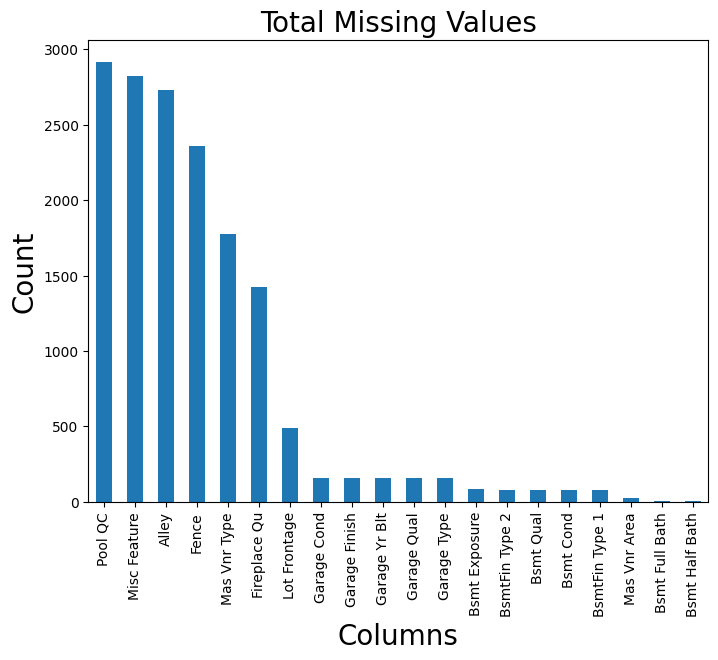

In [9]:
total = housing.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

Hay varias opciones para lidiar con los valores faltantes. Usaremos la función 'Frente del lote'(Lot Frontage) para analizar los valores faltantes.

1. Podemos eliminar los valores faltantes usando el método `dropna()`.

In [19]:
housing.dropna(subset=["Lot Frontage"])

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2925,923251180,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


Con este método, se eliminarán todas las filas que contengan valores nulos en la función 'Lot Frontage', por ejemplo.

2. Podemos eliminar todo el atributo (columna), que contiene valores faltantes, usando el método `drop()`.


In [20]:
housing.drop("Lot Frontage", axis=1)

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


3. Podemos reemplazar los valores faltantes (cero, media, mediana, etc.), usando el método `fillna()`.


In [10]:
median = housing["Lot Frontage"].median()
median

68.0

In [11]:
housing["Lot Frontage"].fillna(median, inplace = True)

In [12]:
housing.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,68.0,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2930,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


El índice n.° 2927, que contiene un valor faltante en el "Frente del lote", ahora ha sido reemplazado por el valor mediano.


<div style="background-color: yellow; color: black; padding: 10px; border-left: 3px solid red;">
  <strong>Advertencia:</strong> Hay formas más sofisticadas de lidiar con los datos faltantes, ver <a href="https://scikit-learn.org/stable/modules/impute.html">aquí</a>. De hecho, eso espero ver en la entrega 😉
</div>



## **Manejo de los valores atípicos**


### Encontrar los valores atípicos


En estadística, un valor atípico es un punto de observación que está distante de otras observaciones. Un valor atípico puede deberse a algunos errores en la recopilación o el registro de datos, o a una alta variabilidad natural de los puntos de datos. La forma de tratar un valor atípico depende en gran medida de nuestros datos o del tipo de análisis a realizar. Los valores atípicos pueden afectar notablemente a nuestros modelos y pueden ser una valiosa fuente de información, proporcionándonos conocimientos sobre comportamientos específicos.

Hay muchas formas de descubrir valores atípicos en nuestros datos. Podemos hacer análisis univariado (usando análisis de una variable) o análisis multivariado (usando dos o más variables). Una de las formas más sencillas de detectar un valor atípico es inspeccionar los datos visualmente, haciendo diagramas de caja o diagramas de dispersión.

### Análisis univariado


Un diagrama de caja es un método para representar gráficamente grupos de datos numéricos a través de sus cuartiles. Los diagramas de caja también pueden tener líneas que se extienden verticalmente desde las cajas (bigotes) que indican variabilidad fuera de los cuartiles superior e inferior. Los valores atípicos se pueden representar como puntos individuales. Para obtener más información sobre los diagramas de caja, haga clic [aquí](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


Aquí, usaremos un diagrama de caja para las características 'Lot Area' y 'SalePrice'.


<Axes: xlabel='Lot Area'>

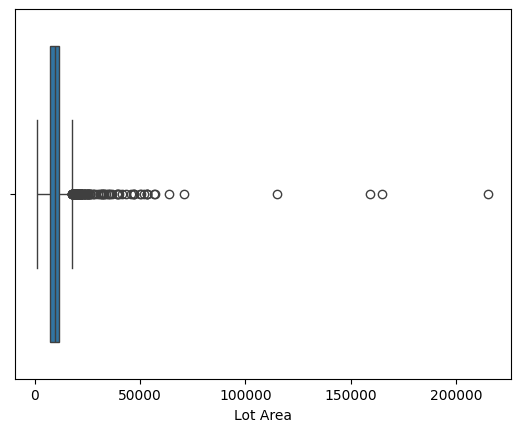

In [13]:
sns.boxplot(x=housing['Lot Area'])

<Axes: xlabel='SalePrice'>

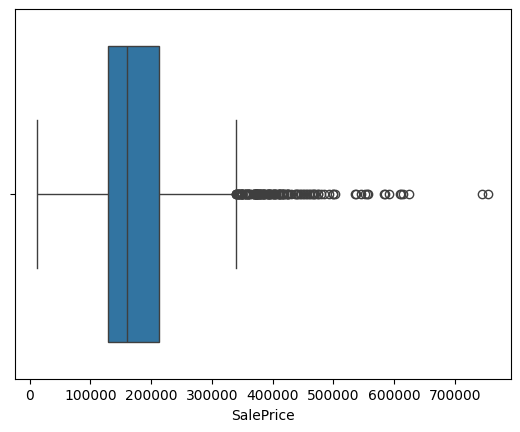

In [14]:
sns.boxplot(x=housing['SalePrice'])

Como podemos ver en estos dos gráficos, tenemos algunos puntos que están trazados fuera del área del diagrama de caja y que se desvían mucho del resto de la población. Eliminarlos o conservarlos dependerá en gran medida del conocimiento de nuestros datos y del tipo de análisis a realizar. En este caso, los puntos que están fuera de nuestros diagramas de caja en el 'Lot Area' y el 'Sale Price'  podrían ser los puntos de datos reales y no es necesario eliminarlos.


### Análisis bivariado


A continuación, veremos el análisis bivariado de las dos características, el precio de venta, 'SalePrice', y la superficie habitable del suelo, 'GrLivArea', y trazaremos el diagrama de dispersión de la relación entre estos dos parámetros.


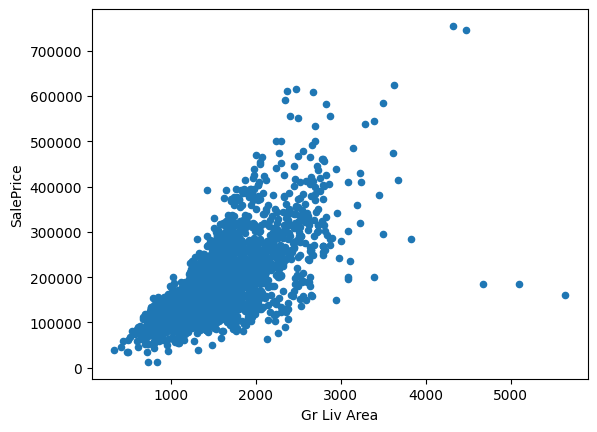

In [15]:
price_area = housing.plot.scatter(x='Gr Liv Area',
                      y='SalePrice')

Del gráfico anterior se desprenden dos valores superiores a los 5000 pies cuadrados de superficie habitable que se desvían del resto de la población y no parecen seguir la tendencia. Se puede especular por qué sucede esto, pero para los fines de esta práctica de laboratorio podemos eliminarlos.

Las otras dos observaciones en la parte superior también se desvían del resto de los puntos, pero también parecen seguir la tendencia, por lo que quizás puedan mantenerse.


### Eliminación de valores atípicos
#### Selección Manual


Primero, ordenaremos todos nuestros valores de 'Gr Liv Area' y seleccionaremos solo los dos últimos.


In [16]:
housing.sort_values(by = 'Gr Liv Area', ascending = False)[:2]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1499,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2181,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850


Ahora usaremos la función pandas `drop()` para eliminar estas dos filas.


In [17]:
outliers_dropped = housing.drop(housing.index[[1499,2181]])

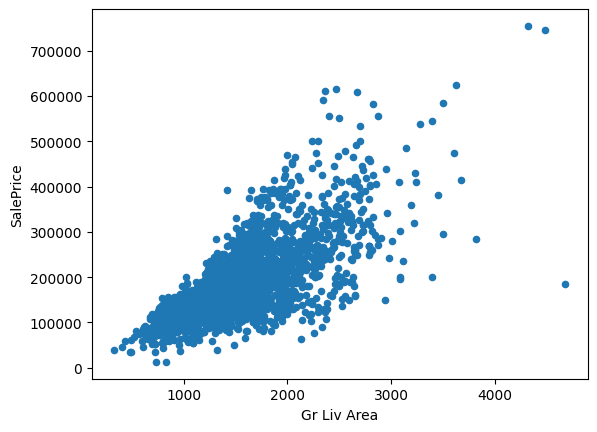

In [18]:
new_plot = outliers_dropped.plot.scatter(x='Gr Liv Area',
                                         y='SalePrice')

Como puedes ver, ya no tenemos los dos últimos puntos del 'Gr Liv Area'.


#### Uso del Rango Intercuantílico

1. Calcular el IQR: El IQR es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Esto te da el rango intercuartílico, que es una medida de la dispersión alrededor de la mediana (los limites de la caja del gráfico de dispersión).

2. Determinar los límites: Los límites para los outliers suelen definirse como 1.5 veces el IQR por encima del tercer cuartil y por debajo del primer cuartil. Es decir, cualquier punto de dato fuera de este rango se considera un outlier.


In [19]:
import pandas as pd

# Asumiendo que `housing` es tu DataFrame y que ya está cargado

# Paso 1: Calcular el IQR
Q1 = housing['SalePrice'].quantile(0.25)
Q3 = housing['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Paso 2: Determinar los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Paso 3: Filtrar los outliers
filtered_housing = housing[(housing['SalePrice'] >= lower_bound) & (housing['SalePrice'] <= upper_bound)]

# `filtered_housing` ahora contiene el DataFrame sin los outliers en la columna 'SalePrice'


#### Z-score Análisis


La puntuación Z es otra forma de identificar matemáticamente valores atípicos. La puntuación Z es el número con signo de desviaciones estándar por las cuales el valor de una observación o punto de datos está por encima del valor medio de lo que se está observando o midiendo. En otras palabras, la puntuación Z es el valor que cuantifica la relación entre un punto de datos y una desviación estándar y los valores medios de un grupo de puntos. Los puntos de datos que estén demasiado lejos de cero se tratarán como valores atípicos. En la mayoría de los casos, se utiliza un umbral de 3 o -3. Por ejemplo, si el valor de la puntuación Z es mayor o menor que 3 o -3 desviaciones estándar respectivamente, ese punto de datos se identificará como un valor atípico.

Para obtener más información sobre la puntuación Z, visite esta [página de Wikipedia](https://en.wikipedia.org/wiki/Standard_score?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01)


Below, we are using Z-score function from `scipy` library to detect the outliers in our 'Low Qual Fin SF' parameter. To learn more about `scipy.stats`, please visit this [link](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


In [20]:
# Cálculo de Z-score para la columna 'SalesPrice'
housing['Z_score'] = stats.zscore(housing['Low Qual Fin SF'])

# Filtrado de outliers basado en Z-score (conservar filas con Z-score entre -3 y 3)
housing_filtered = housing[(housing['Z_score'] > -3) & (housing['Z_score'] < 3)]

# Verificación de los resultados
result = {
    "original_size": housing.shape[0],
    "filtered_size": housing_filtered.shape[0],
    "removed_outliers": housing.shape[0] - housing_filtered.shape[0]
}

result

{'original_size': 2931, 'filtered_size': 2900, 'removed_outliers': 31}

# Felicitaciones, ¡ya sabes limpiar datos! Al menos lo más importante
